In [1]:
import warnings
warnings.simplefilter('ignore')

In [3]:
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


## Data Manipulation

In [5]:
df = pd.read_csv('dataset.csv')

In [7]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [10]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

In [11]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [12]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [14]:
# drop unneccessary columns
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns= ['y', 'ds']

KeyError: "['Time Date' 'Product' 'Store' 'Year' 'Month' 'Day'] not found in axis"

In [15]:
df.head()

,y,ds
0,2926.000000,2018-01-01
1,2687.531000,2018-01-02
2,2793.000000,2018-01-03
3,2394.000000,2018-01-04
4,2660.000000,2018-01-05
...,...,...
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15


## Train Model

In [16]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

## Forecast

In [17]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.090656,677.919048,4115.650560,3041.090656,3041.090656,-643.078244,-643.078244,-643.078244,466.298831,...,16.629586,16.629586,16.629586,-1126.006661,-1126.006661,-1126.006661,0.0,0.0,0.0,2398.012413
1,2018-01-02,3041.861642,780.766948,3924.308934,3041.861642,3041.861642,-653.110974,-653.110974,-653.110974,466.298831,...,-11.277476,-11.277476,-11.277476,-1108.132329,-1108.132329,-1108.132329,0.0,0.0,0.0,2388.750668
2,2018-01-03,3042.632627,742.453176,3973.425642,3042.632627,3042.632627,-627.189373,-627.189373,-627.189373,466.298831,...,-4.409574,-4.409574,-4.409574,-1089.078630,-1089.078630,-1089.078630,0.0,0.0,0.0,2415.443254
3,2018-01-04,3043.403613,864.146742,4060.741193,3043.403613,3043.403613,-580.147667,-580.147667,-580.147667,466.298831,...,22.476339,22.476339,22.476339,-1068.922836,-1068.922836,-1068.922836,0.0,0.0,0.0,2463.255946
4,2018-01-05,3044.174598,872.333081,4070.612572,3044.174598,3044.174598,-616.082261,-616.082261,-616.082261,466.298831,...,-34.586261,-34.586261,-34.586261,-1047.794831,-1047.794831,-1047.794831,0.0,0.0,0.0,2428.092337


In [18]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4240.033537,2072.635904,5384.935656,4236.874811,4242.926501,-515.675715,-515.675715,-515.675715,466.298831,...,16.629586,16.629586,16.629586,-998.604132,-998.604132,-998.604132,0.0,0.0,0.0,3724.357822
1176,2021-03-23,4241.106358,2070.087559,5304.009949,4237.884783,4244.038485,-533.141500,-533.141500,-533.141500,466.298831,...,-11.277476,-11.277476,-11.277476,-988.162856,-988.162856,-988.162856,0.0,0.0,0.0,3707.964857
1177,2021-03-24,4242.179179,2106.550892,5187.145461,4238.911551,4245.145582,-518.610659,-518.610659,-518.610659,466.298831,...,-4.409574,-4.409574,-4.409574,-980.499916,-980.499916,-980.499916,0.0,0.0,0.0,3723.568519
1178,2021-03-25,4243.251999,2234.998897,5432.260876,4239.935533,4246.252679,-487.423340,-487.423340,-487.423340,466.298831,...,22.476339,22.476339,22.476339,-976.198510,-976.198510,-976.198510,0.0,0.0,0.0,3755.828660
1179,2021-03-26,4244.324820,2220.462446,5234.387896,4240.972613,4247.364638,-544.044281,-544.044281,-544.044281,466.298831,...,-34.586261,-34.586261,-34.586261,-975.756851,-975.756851,-975.756851,0.0,0.0,0.0,3700.280540


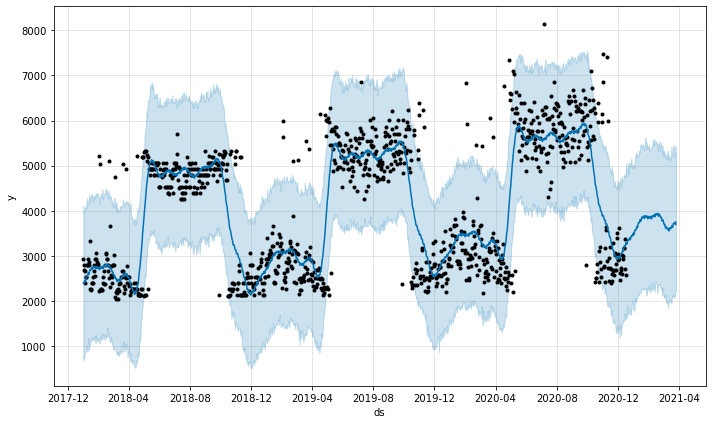

In [19]:
plot1 = m.plot(forecast)

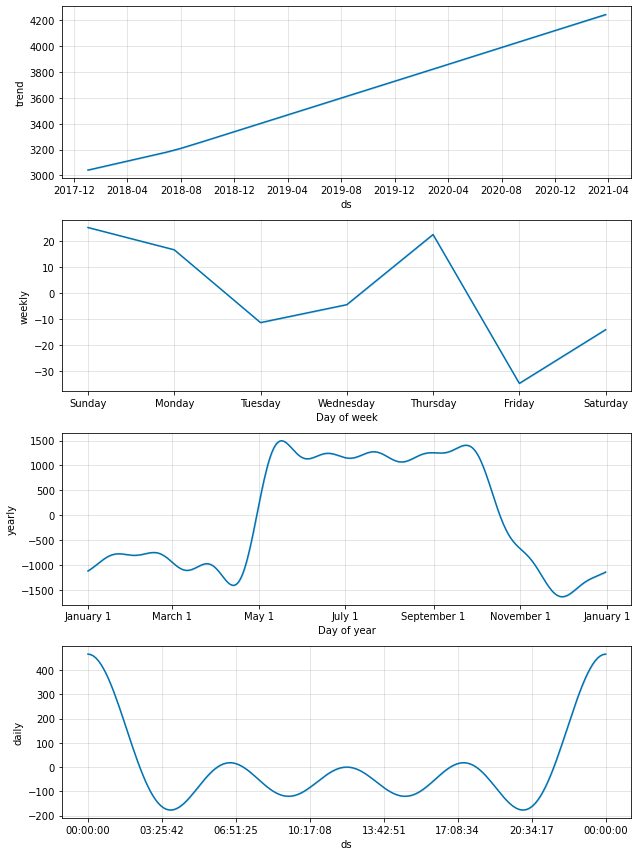

In [20]:
plot2 = m.plot_components(forecast)